In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def extract_sinusoidal_features(X, k):
    features = []
    
    for i in range(1, k+1):
        features.append(np.sin(np.pi * X * i))
    
    # Concatenate all the features into a single array along axis=1 (column-wise concatenation)
    return np.concatenate(features, axis=1)

In [4]:
def hat_w(X, y, k):
    phi = extract_sinusoidal_features(X, k)
    w = np.linalg.solve(phi.T @ phi, phi.T @ y)
    return w

In [5]:
def hat_w_pinv(X, y, k):
    phi = extract_sinusoidal_features(X, k)
    w = np.linalg.pinv(phi.T @ phi) @ phi.T @ y
    return w

In [6]:
def predict_sinusoidal(X, w, k):
    phi = extract_sinusoidal_features(X, k)
    return phi @ w

In [7]:
def g_sigma(x, sigma=0.07):
    sin_squared = np.sin(2 * np.pi * x)**2
    epsilon = np.random.normal(0, sigma, size=x.shape) # Size gets the number of epsilons based off the number of x values
    
    return sin_squared + epsilon

In [8]:
# Generate training data
x_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
y_train = g_sigma(x_train, sigma=0.07)

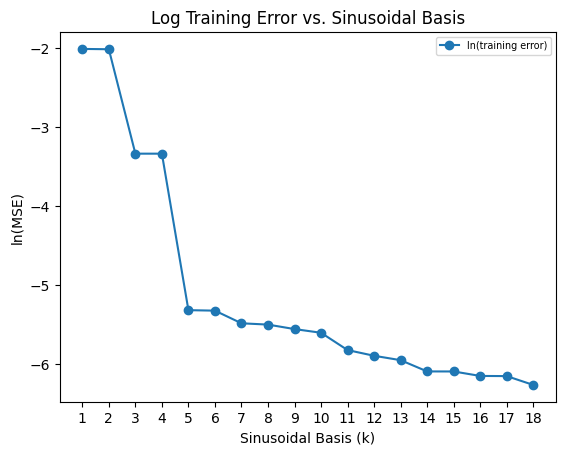

In [9]:
# (b)
training_errors = []

for k in range(1,19):
    w = hat_w(x_train, y_train, k)
    
    y_fitted = predict_sinusoidal(x_train, w, k)
    
    mse = np.mean((y_train - y_fitted)**2)
    training_errors.append(mse)
    
ln_training_errors = np.log(training_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")

plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs. Sinusoidal Basis')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()

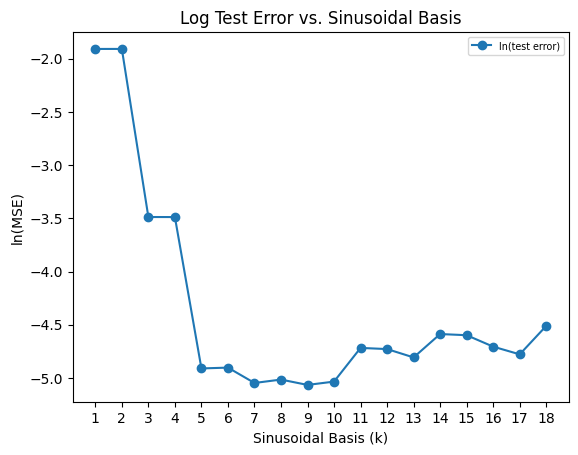

In [10]:
# (c)
x_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
y_test = g_sigma(x_test, sigma=0.07)

test_errors = []

for k in range(1, 19):
    w_train = hat_w(x_train, y_train, k)
    
    phi_test = extract_sinusoidal_features(x_test, k)
    
    y_test_pred = phi_test @ w_train
    
    mse_test = np.mean((y_test - y_test_pred)**2)
    test_errors.append(mse_test)

ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Test Error vs. Sinusoidal Basis')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()

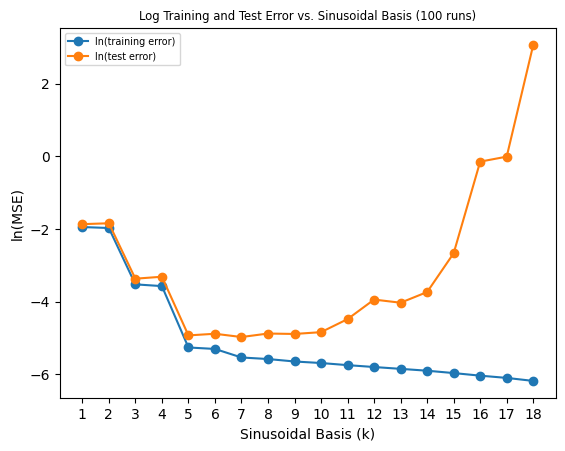

In [11]:
# (d)

num_runs = 100
training_errors = np.zeros(18)
test_errors = np.zeros(18)

X_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
Y_test = g_sigma(X_test, sigma=0.07)

for run in range(num_runs):

    X_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
    Y_train = g_sigma(X_train, sigma=0.07)

    for k in range(1, 19):
        
        # Pseudoinverse
        W_train = hat_w_pinv(X_train, Y_train, k)

        Y_train_pred = predict_sinusoidal(X_train, W_train, k)
        Y_test_pred = predict_sinusoidal(X_test, W_train, k)

        training_errors[k-1] += np.mean((Y_train - Y_train_pred)**2)
        test_errors[k-1] += np.mean((Y_test - Y_test_pred)**2)

training_errors /= num_runs
test_errors /= num_runs

ln_training_errors = np.log(training_errors)
ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")
plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title(f'Log Training and Test Error vs. Sinusoidal Basis ({num_runs} runs)', fontsize='small')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()